# **L = 0**

In [10]:
# Ensure the 'quadprog' package is installed
if (!requireNamespace("quadprog", quietly = TRUE)) {
  install.packages("quadprog")
}

library(quadprog)
library(readxl)  # Added to read Excel files

# Ensure the file path is correct
file_path <- "ESG_return.xlsx"
returns <- as.matrix(read_excel(file_path, sheet = "L0", col_names = TRUE))

# Check if the data has the expected dimensions
if (nrow(returns) != 243 || ncol(returns) != 4) {
  stop("The returns matrix must have 246 rows (trading days) and 4 columns (stocks).")
}
# Calculate mean returns for each stock
mean_returns <- colMeans(returns)

# Calculate covariance matrix of stock returns
cov_matrix <- cov(returns)

# Define the objective function components
Amat <- cbind(rep(1, 4), diag(4))                # Constraints: weights sum to 1 and no short selling
bvec <- c(1, rep(0, 4))                          # RHS of constraints

# Function to optimize portfolio for a given alpha
optimize_portfolio <- function(alpha) {
  Dmat <- cov_matrix         #Quadratic term for variance
  dvec <- mean_returns       #Linear term for mean returns
  
  # Solve the quadratic programming problem
  result <- solve.QP(2*(1 - alpha)*Dmat, -alpha*dvec, Amat, bvec, meq = 1)
  
  # Optimal weights
  optimal_weights <- result$solution
  
  # Round the optimal weights to 4 decimals
  optimal_weights <- round(optimal_weights, 4)
  
  return(optimal_weights)
}

# Run for alpha = 0, 0.2, 0.6, 0.8
alphas <- c(0.2, 0.4, 0.6, 0.8)
optimal_weights_list <- lapply(alphas, optimize_portfolio)

# Output the results
names(optimal_weights_list) <- paste("Alpha =", alphas)
optimal_weights_list

$`Alpha = 0.2`
[1] 0.0000 0.2651 0.2326 0.5023

$`Alpha = 0.4`
[1] 0.0000 0.3926 0.2142 0.3931

$`Alpha = 0.6`
[1] 0.0000 0.6477 0.1775 0.1747

$`Alpha = 0.8`
[1] 0 1 0 0

In [11]:
mean_returns
cov_matrix

FPT.VN        GEG.VN        VIC.VN        VNM.VN 
 2.402058e-03 -2.197531e-04 -4.115226e-06  3.909465e-05

,FPT.VN,GEG.VN,VIC.VN,VNM.VN
FPT.VN,2.339385e-04,7.086165e-05,3.618414e-05,5.642918e-05
GEG.VN,7.086165e-05,3.528160e-04,4.870108e-05,2.327520e-05
VIC.VN,3.618414e-05,4.870108e-05,2.203429e-04,5.063710e-05
VNM.VN,5.642918e-05,2.327520e-05,5.063710e-05,1.318683e-04


In [15]:
library(quadprog)

# Example with 2 assets
alpha <- 0.2
r <- c(0.00024, 0.0001)
Sigma <- matrix(c(0.0001, 0.00005, 0.00005, 0.0001), nrow = 2)

Q <- (1 - alpha) * Sigma
c <- -alpha * r

# Equality constraint (weights sum to 1)
A_eq <- matrix(1, nrow = 1, ncol = 2)
b_eq <- 1

# No short selling (weights >= 0)
A_ineq <- diag(2)  # Identity matrix for inequality constraints (w_i >= 0)
b_ineq <- rep(0, 2)

# Combine equality and inequality constraints
A <- rbind(A_eq, A_ineq)
b <- c(b_eq, b_ineq)

# Solve the quadratic programming problem
result <- solve.QP(Dmat = Q, dvec = c, Amat = t(A), bvec = b, meq = 1)

# Extract optimal portfolio weights
optimal_weights <- result$solution

# Print the optimal portfolio weights
print("Optimal Portfolio Weights:")
print(optimal_weights)

[1] "Optimal Portfolio Weights:"
[1] 0.15 0.85


In [13]:
# Load the necessary library
library(quadprog)

# Given data
alpha <- 0.2

# Mean returns vector
r <- c(0.00240205761316872, -0.000219753086419753, -4.11522633744854e-06, 3.90946502057613e-05)

# Covariance matrix (Sigma)
Sigma <- matrix(c(
  2.339385e-04, 7.086165e-05, 3.618414e-05, 5.642918e-05,
  7.086165e-05, 3.528160e-04, 4.870108e-05, 2.327520e-05,
  3.618414e-05, 4.870108e-05, 2.203429e-04, 5.063710e-05,
  5.642918e-05, 2.327520e-05, 5.063710e-05, 1.318683e-04
), nrow = 4, byrow = TRUE)

# Q matrix and c vector
Q <- (1 - alpha) * Sigma  # Quadratic term (portfolio variance)
c <- -alpha * r           # Linear term (portfolio return)

# Equality constraint (weights sum to 1)
A <- matrix(1, nrow = 1, ncol = 4)  # Row of ones for sum of weights
b <- 1  # Weights must sum to 1

# No short selling (w_i >= 0)
# For quadratic programming, the no short-selling condition is handled by setting lower bounds as zero
D <- diag(4)  # Identity matrix for inequality constraints (w_i >= 0)

# Combine equality and inequality constraints
Amat <- rbind(A, D)
bvec <- c(b, rep(0, 4))

# Solve the quadratic programming problem
result <- solve.QP(Dmat = Q, dvec = c, Amat = t(Amat), bvec = bvec, meq = 1)

# Extract optimal portfolio weights
optimal_weights <- result$solution

# Print the optimal portfolio weights
print("Optimal Portfolio Weights:")
print(optimal_weights)

[1] "Optimal Portfolio Weights:"
[1] 4.002123e-17 3.416171e-01 2.215608e-01 4.368222e-01


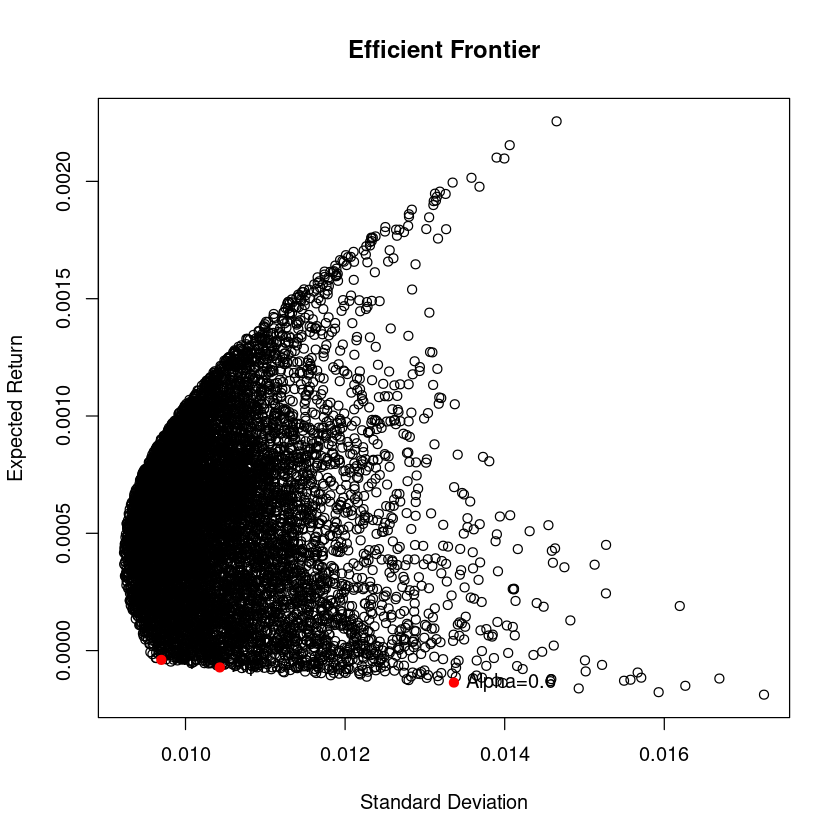

In [3]:
# Function to simulate portfolios and calculate returns and risk
simulate_portfolio <- function(n_simulations) {
  weights <- matrix(runif(n_simulations * 4), ncol = 4)
  weights <- weights / rowSums(weights)

  expected_returns <- weights %*% mean_returns
  portfolio_variances <- diag(weights %*% cov_matrix %*% t(weights))
  portfolio_sds <- sqrt(portfolio_variances)

  return(data.frame(expected_return = expected_returns, standard_deviation = portfolio_sds))
}

# Simulate a large number of portfolios
n_simulations <- 10000
simulated_portfolios <- simulate_portfolio(n_simulations)

# Plot the efficient frontier
plot(simulated_portfolios$standard_deviation, simulated_portfolios$expected_return,
     xlab = "Standard Deviation", ylab = "Expected Return", main = "Efficient Frontier")

# Add optimal portfolios to the plot
for (i in 1:length(alphas)) {
  alpha <- alphas[i]
  optimal_weights <- optimal_weights_list[[i]]
  
  # Calculate expected return and standard deviation of the optimal portfolio
  optimal_return <- sum(optimal_weights * mean_returns)
  optimal_sd <- sqrt(t(optimal_weights) %*% cov_matrix %*% optimal_weights)
  
  points(optimal_sd, optimal_return, col = "red", pch = 19)
  text(optimal_sd, optimal_return, labels = paste0("Alpha=", alpha), pos = 4)
}

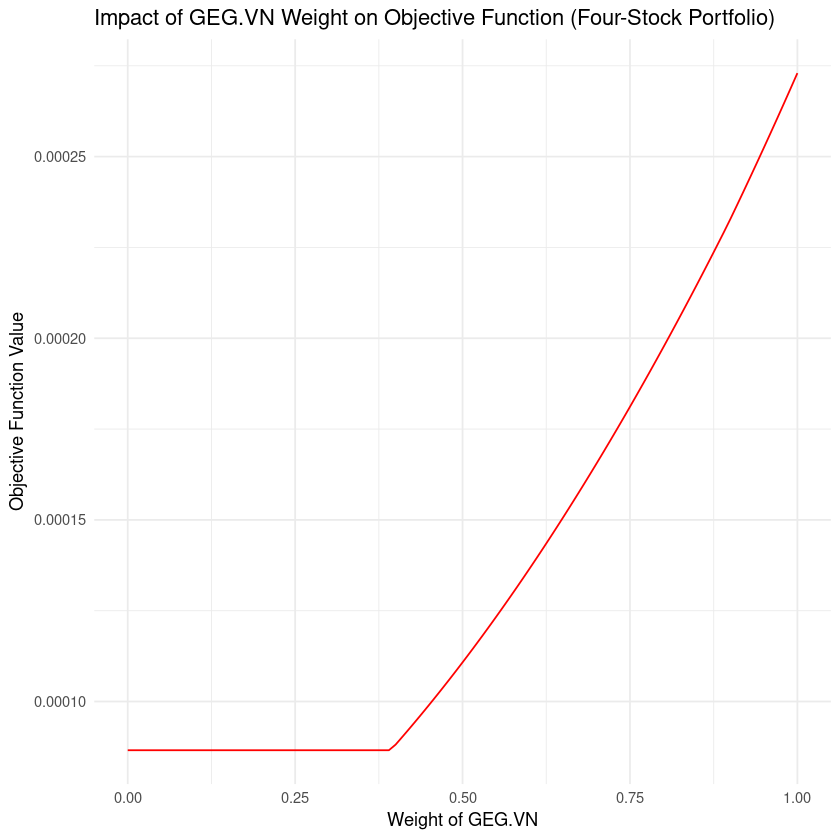

In [3]:
alpha <- 0.4  # Risk aversion level

# Simulate weights for GEG
weights_geg <- seq(0, 1, by = 0.01)
results_geg <- data.frame(Weight_GEG = weights_geg, Function_Value = NA)

for (i in 1:length(weights_geg)) {
  w_geg <- weights_geg[i]
  
  # Adjust constraints to fix GEG weight
  Amat <- cbind(rep(1, 4), diag(4))
  bvec <- c(1, rep(0, 4))
  
  # Fix GEG weight
  Amat <- cbind(Amat, c(0, 1, 0, 0))  # Add constraint for GEG
  bvec <- c(bvec, w_geg)              # Fix GEG weight
  
  # Solve quadratic program
  result <- tryCatch({
    solve.QP(
      2 * (1 - alpha) * cov_matrix,
      -alpha * mean_returns,
      Amat,
      bvec,
      meq = 2  # Two equality constraints: sum of weights = 1, GEG weight fixed
    )
  }, error = function(e) return(NULL))
  
  # Store function value
  if (!is.null(result)) {
    weights <- result$solution
    port_return <- sum(weights * mean_returns)
    port_variance <- t(weights) %*% cov_matrix %*% weights
    results_geg$Function_Value[i] <- -(1-alpha) * port_return + (alpha) * port_variance
  } else {
    results_geg$Function_Value[i] <- NA
  }
}

# Plot the results for GEG
ggplot(results_geg, aes(x = Weight_GEG, y = Function_Value)) +
  geom_line(color = "red") +
  labs(
    title = "Impact of GEG.VN Weight on Objective Function (Four-Stock Portfolio)",
    x = "Weight of GEG.VN",
    y = "Objective Function Value"
  ) +
  theme_minimal()

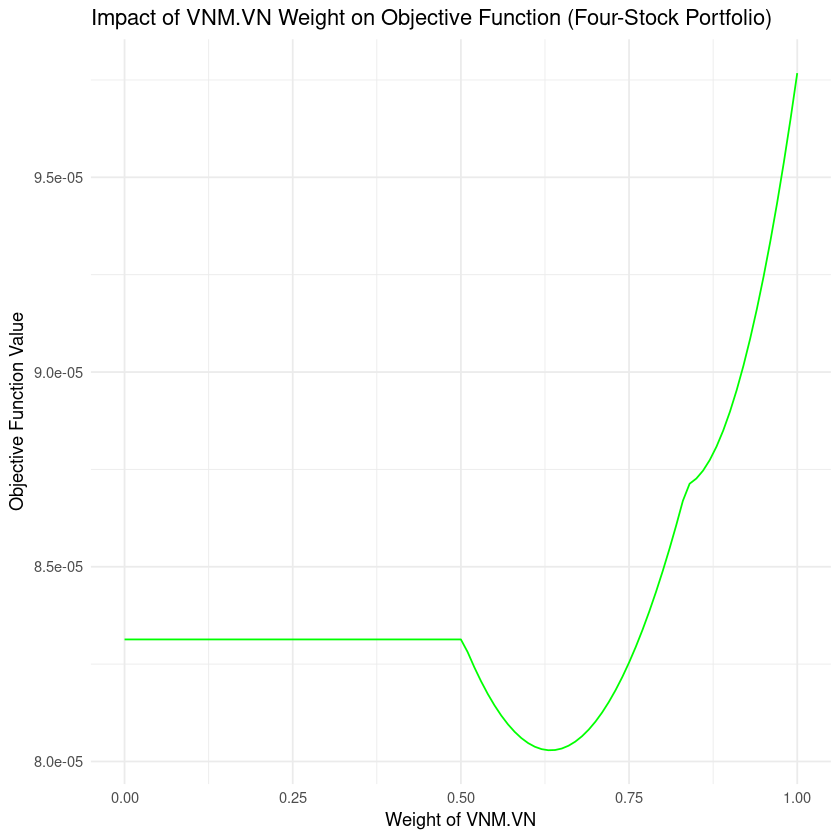

In [8]:
# Set alpha for risk aversion level
alpha <- 0.2  # Risk aversion level

# Simulate weights for VNM
weights_vnm <- seq(0, 1, by = 0.01)
results_vnm <- data.frame(Weight_VNM = weights_vnm, Function_Value = NA)

for (i in 1:length(weights_vnm)) {
  w_vnm <- weights_vnm[i]
  
  # Adjust constraints to fix VNM weight
  Amat <- cbind(rep(1, 4), diag(4))
  bvec <- c(1, rep(0, 4))
  
  # Fix VNM weight
  Amat <- cbind(Amat, c(0, 0, 0, 1))  # Add constraint for VNM
  bvec <- c(bvec, w_vnm)              # Fix VNM weight
  
  # Solve quadratic program
  result <- tryCatch({
    solve.QP(
      2 * (1 - alpha) * cov_matrix,
      -alpha * mean_returns,
      Amat,
      bvec,
      meq = 2  # Two equality constraints: sum of weights = 1, VNM weight fixed
    )
  }, error = function(e) return(NULL))
  
  # Store function value
  if (!is.null(result)) {
    weights <- result$solution
    port_return <- sum(weights * mean_returns)
    port_variance <- t(weights) %*% cov_matrix %*% weights
    results_vnm$Function_Value[i] <- -alpha * port_return + (1 - alpha) * port_variance
  } else {
    results_vnm$Function_Value[i] <- NA
  }
}

# Plot the results for VNM
ggplot(results_vnm, aes(x = Weight_VNM, y = Function_Value, group = 1)) +
  geom_line(color = "green") +
  labs(
    title = "Impact of VNM.VN Weight on Objective Function (Four-Stock Portfolio)",
    x = "Weight of VNM.VN",
    y = "Objective Function Value"
  ) +
  theme_minimal()


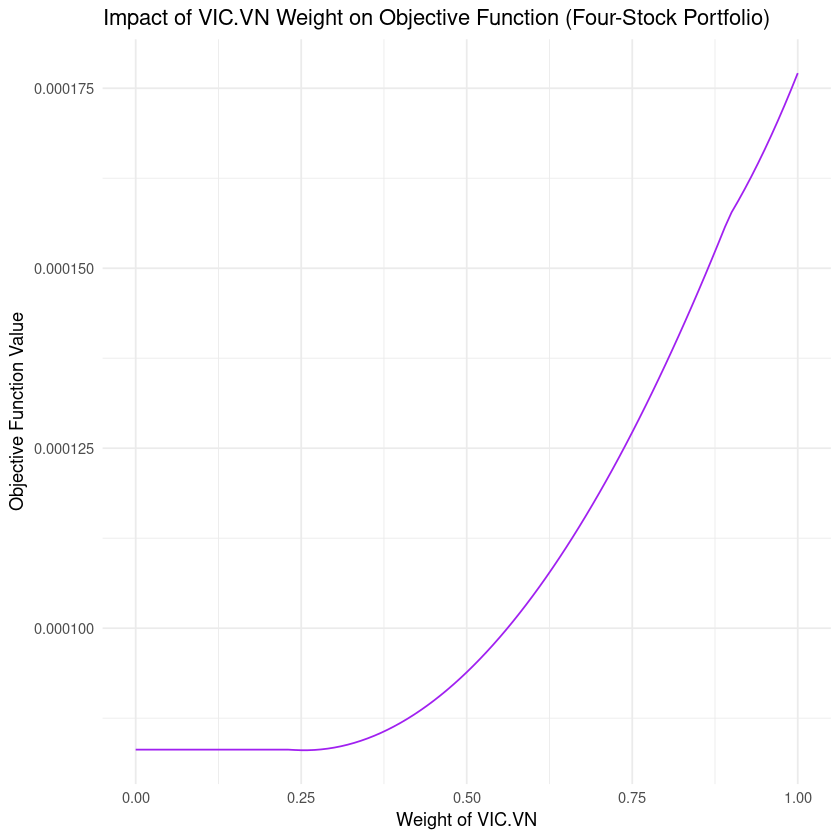

In [11]:
# Set alpha for risk aversion level
alpha <- 0.2  # Risk aversion level

# Simulate weights for VIC
weights_vic <- seq(0, 1, by = 0.01)
results_vic <- data.frame(Weight_VIC = weights_vic, Function_Value = NA)

for (i in 1:length(weights_vic)) {
  w_vic <- weights_vic[i]
  
  # Adjust constraints to fix VIC weight
  Amat <- cbind(rep(1, 4), diag(4))
  bvec <- c(1, rep(0, 4))
  
  # Fix VIC weight
  Amat <- cbind(Amat, c(0, 0, 1, 0))  # Add constraint for VIC
  bvec <- c(bvec, w_vic)              # Fix VIC weight
  
  # Solve quadratic program
  result <- tryCatch({
    solve.QP(
      2 * (1 - alpha) * cov_matrix,
      -alpha * mean_returns,
      Amat,
      bvec,
      meq = 2  # Two equality constraints: sum of weights = 1, VIC weight fixed
    )
  }, error = function(e) return(NULL))
  
  # Store function value
  if (!is.null(result)) {
    weights <- result$solution
    port_return <- sum(weights * mean_returns)
    port_variance <- t(weights) %*% cov_matrix %*% weights
    results_vic$Function_Value[i] <- -alpha * port_return + (1 - alpha) * port_variance
  } else {
    results_vic$Function_Value[i] <- NA
  }
}

# Plot the results for VIC
ggplot(results_vic, aes(x = Weight_VIC, y = Function_Value, group = 1)) +
  geom_line(color = "purple") +
  labs(
    title = "Impact of VIC.VN Weight on Objective Function (Four-Stock Portfolio)",
    x = "Weight of VIC.VN",
    y = "Objective Function Value"
  ) +
  theme_minimal()


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


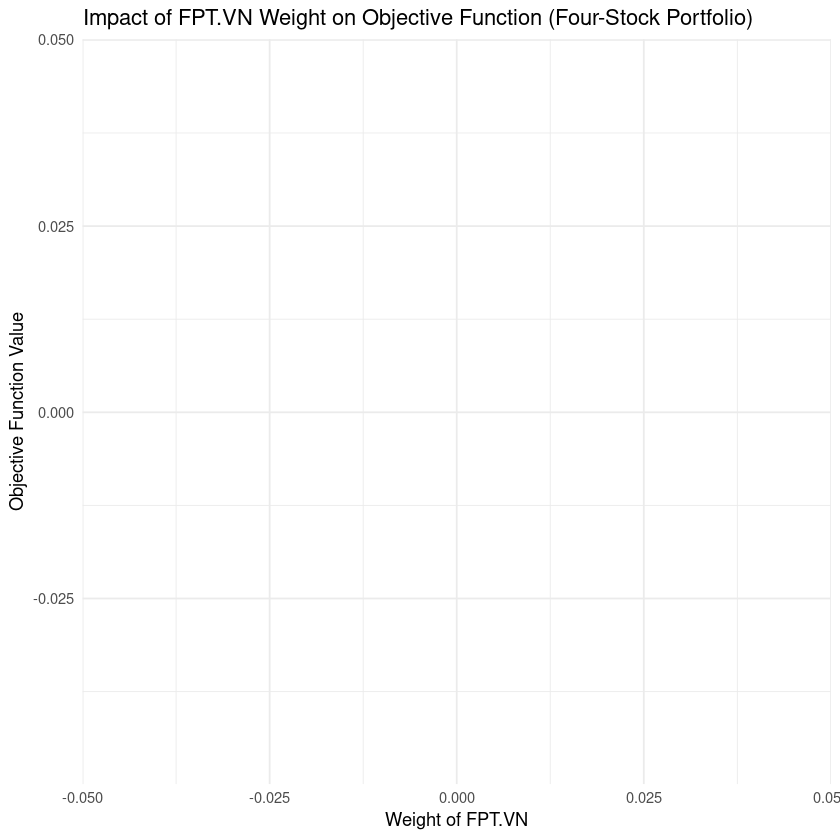

In [9]:
alpha <- 0.2  # Risk aversion level

# Simulate weights for FPT
weights_fpt <- seq(0, 1, by = 0.01)
results_fpt <- data.frame(Weight_FPT = weights_fpt, Function_Value = NA)

for (i in 1:length(weights_fpt)) {
  w_fpt <- weights_fpt[i]
  
  # Adjust constraints to fix FPT weight
  Amat <- cbind(rep(1, 4), diag(4))
  bvec <- c(1, rep(0, 4))
  
  # Fix FPT weight
  Amat <- cbind(Amat, c(1, 0, 0, 0))  # Add constraint for FPT
  bvec <- c(bvec, w_fpt)              # Fix FPT weight
  
  # Solve quadratic program
  result <- tryCatch({
    solve.QP(
      2 * (1 - alpha) * cov_matrix,
      -alpha * mean_returns,
      Amat,
      bvec,
      meq = 2  # Two equality constraints: sum of weights = 1, FPT weight fixed
    )
  }, error = function(e) return(NULL))
  
  # Store function value
  if (!is.null(result)) {
    weights <- result$solution
    port_return <- sum(weights * mean_returns)
    port_variance <- t(weights) %*% cov_matrix %*% weights
    results_fpt$Function_Value[i] <- -alpha * port_return + (1 - alpha) * port_variance
  } else {
    results_fpt$Function_Value[i] <- NA
  }
}
# Remove NA values before plotting
results_fpt <- results_fpt[!is.na(results_fpt$Function_Value), ]

# Plot the results for FPT
ggplot(results_fpt, aes(x = Weight_FPT, y = Function_Value, group = 1)) +
  geom_line(color = "blue") +
  labs(
    title = "Impact of FPT.VN Weight on Objective Function (Four-Stock Portfolio)",
    x = "Weight of FPT.VN",
    y = "Objective Function Value"
  ) +
  theme_minimal()


In [1]:
# Ensure the 'quadprog' package is installed
if (!requireNamespace("quadprog", quietly = TRUE)) {
  install.packages("quadprog")
}

library(quadprog)
library(readxl)  # Added to read Excel files

# Ensure the file path is correct
file_path <- "ESG_return.xlsx"
returns <- as.matrix(read_excel(file_path, sheet = "L0", col_names = TRUE))

# Check if the data has the expected dimensions
if (nrow(returns) != 243 || ncol(returns) != 4) {
  stop("The returns matrix must have 246 rows (trading days) and 4 columns (stocks).")
}
# Calculate mean returns for each stock
mean_returns <- colMeans(returns)

# Calculate covariance matrix of stock returns
cov_matrix <- cov(returns)

# Define the objective function components
Amat <- cbind(rep(1, 4), diag(4))                # Constraints: weights sum to 1 and no short selling
bvec <- c(1, rep(0, 4))                          # RHS of constraints

# Function to optimize portfolio for a given alpha
optimize_portfolio <- function(alpha) {
  Dmat <- cov_matrix         #Quadratic term for variance
  dvec <- mean_returns       #Linear term for mean returns
  
  # Solve the quadratic programming problem
  result <- solve.QP(2*(1 - alpha)*Dmat, -alpha*dvec, Amat, bvec, meq = 1)
  
  # Optimal weights
  optimal_weights <- result$solution
  
  # Round the optimal weights to 4 decimals
  optimal_weights <- round(optimal_weights, 4)
  
  return(optimal_weights)
}

# Run for alpha = 0, 0.2, 0.6, 0.8
alphas <- c(0.2, 0.4, 0.6, 0.8)
optimal_weights_list <- lapply(alphas, optimize_portfolio)

# Output the results
names(optimal_weights_list) <- paste("Alpha =", alphas)
optimal_weights_list

# Downloading packages -------------------------------------------------------
- Downloading quadprog from CRAN ...            OK [30.1 Kb in 0.19s]
Successfully downloaded 1 package in 0.95 seconds.

The following package(s) will be installed:
- quadprog [1.5-8]
These packages will be installed into "~/renv/library/linux-ubuntu-jammy/R-4.4/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing quadprog ...                       OK [installed binary and cached in 0.59s]


[1] 0.0000 0.4947 0.1996 0.3058

# L = 0.25

In [2]:
# Ensure the 'quadprog' package is installed
if (!requireNamespace("quadprog", quietly = TRUE)) {
  install.packages("quadprog")
}

library(quadprog)
library(readxl)  # Added to read Excel files

# Ensure the file path is correct
file_path <- "ESG_return.xlsx"
returns_25 <- as.matrix(read_excel(file_path, sheet = "L25", col_names = TRUE))

# Check if the data has the expected dimensions
if (nrow(returns_25) != 245 || ncol(returns_25) != 4) {
  stop("The returns matrix must have 246 rows (trading days) and 4 columns (stocks).")
}

# Calculate mean returns for each stock
mean_returns_25 <- colMeans(returns_25)

# Calculate covariance matrix of stock returns
cov_matrix_25 <- cov(returns_25)

# Define the objective function components
Amat <- cbind(rep(1, 4), diag(4))                # Constraints: weights sum to 1 and no short selling
bvec <- c(1, rep(0, 4))                          # RHS of constraints

# Function to optimize portfolio for a given alpha
optimize_portfolio <- function(alpha) {
  Dmat <- (1 - alpha) * cov_matrix_25         # Quadratic term for variance
  dvec <- -alpha * mean_returns_25                  # Linear term for mean returns
  
  # Solve the quadratic programming problem
  result <- solve.QP(2*Dmat, dvec, Amat, bvec, meq = 1)
  
  # Optimal weights
  optimal_weights_25 <- result$solution
  
  # Round the optimal weights to 4 decimals
  optimal_weights <- round(optimal_weights_25, 4)
  
  return(optimal_weights)
}

# Run for alpha = 0.2, 0.4, 0.6, 0.8
alphas_25 <- c(0.2, 0.4, 0.6, 0.8)
optimal_weights_25_list <- lapply(alphas_25, optimize_portfolio)

# Output the results
names(optimal_weights_25_list) <- paste("Alpha =", alphas_25)
optimal_weights_25_list

$`Alpha = 0.2`
[1] 0.0000 0.3590 0.3715 0.2695

$`Alpha = 0.4`
[1] 0.0000 0.5832 0.4168 0.0000

$`Alpha = 0.6`
[1] 0.0000 0.8711 0.1289 0.0000

$`Alpha = 0.8`
[1] 0 1 0 0

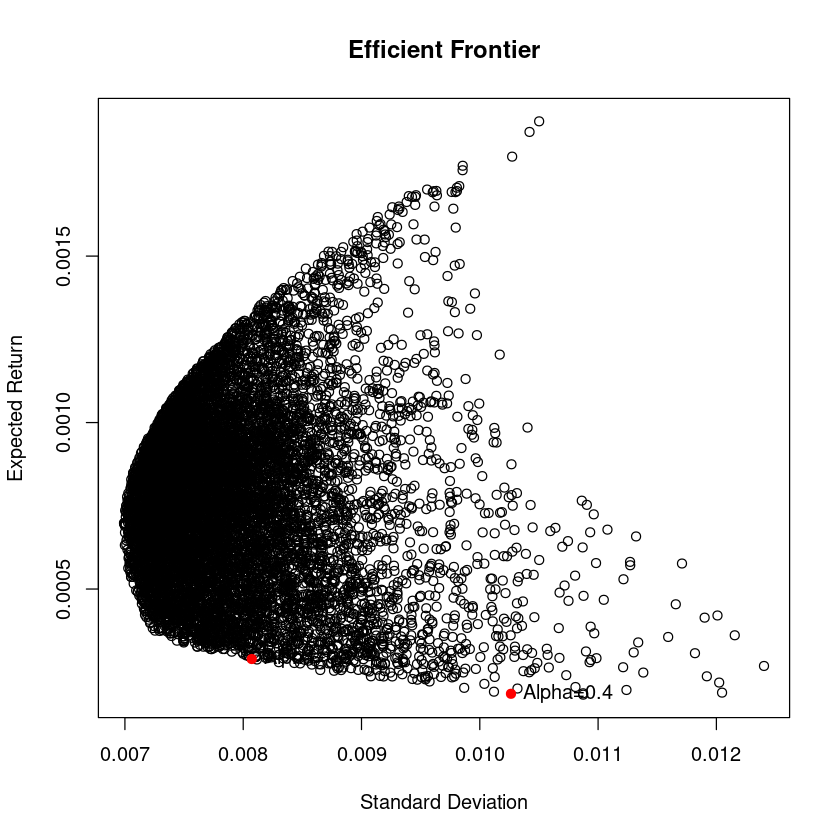

In [3]:
# Function to simulate portfolios and calculate returns and risk
simulate_portfolio <- function(n_simulations) {
  weights <- matrix(runif(n_simulations * 4), ncol = 4)
  weights <- weights / rowSums(weights)

  expected_returns <- weights %*% mean_returns_25
  portfolio_variances <- diag(weights %*% cov_matrix_25 %*% t(weights))
  portfolio_sds <- sqrt(portfolio_variances)

  return(data.frame(expected_return = expected_returns, standard_deviation = portfolio_sds))
}

# Simulate a large number of portfolios
n_simulations <- 10000
simulated_portfolios <- simulate_portfolio(n_simulations)

# Plot the efficient frontier
plot(simulated_portfolios$standard_deviation, simulated_portfolios$expected_return,
     xlab = "Standard Deviation", ylab = "Expected Return", main = "Efficient Frontier")

# Add optimal portfolios to the plot
for (i in 1:length(alphas_25)) {
  alpha <- alphas_25[i]
  optimal_weights <- optimal_weights_25_list[[i]]
  
  # Calculate expected return and standard deviation of the optimal portfolio
  optimal_return <- sum(optimal_weights * mean_returns_25)
  optimal_sd <- sqrt(t(optimal_weights) %*% cov_matrix_25 %*% optimal_weights)
  
  points(optimal_sd, optimal_return, col = "red", pch = 19)
  text(optimal_sd, optimal_return, labels = paste0("Alpha=", alpha), pos = 4)
}

# L = 0.5

In [4]:
# Ensure the 'quadprog' package is installed
if (!requireNamespace("quadprog", quietly = TRUE)) {
  install.packages("quadprog")
}

library(quadprog)
library(readxl)  # Added to read Excel files

# Ensure the file path is correct
file_path <- "ESG_return.xlsx"
returns_50 <- as.matrix(read_excel(file_path, sheet = "L50", col_names = TRUE))

# Check if the data has the expected dimensions
if (nrow(returns_50) != 245 || ncol(returns_50) != 4) {
  stop("The returns matrix must have 246 rows (trading days) and 4 columns (stocks).")
}

# Calculate mean returns for each stock
mean_returns_50 <- colMeans(returns_50)

# Calculate covariance matrix of stock returns
cov_matrix_50 <- cov(returns_50)

# Define the objective function components
Amat <- cbind(rep(1, 4), diag(4))                # Constraints: weights sum to 1 and no short selling
bvec <- c(1, rep(0, 4))                          # RHS of constraints

# Function to optimize portfolio for a given alpha
optimize_portfolio <- function(alpha) {
  Dmat <- (1 - alpha) * cov_matrix_50         # Quadratic term for variance
  dvec <- -alpha * mean_returns_50                  # Linear term for mean returns
  
  # Solve the quadratic programming problem
  result <- solve.QP(2*Dmat, dvec, Amat, bvec, meq = 1)
  
  # Optimal weights
  optimal_weights_50 <- result$solution
  
  # Round the optimal weights to 4 decimals
  optimal_weights_50 <- round(optimal_weights_50, 4)
  
  return(optimal_weights_50)
}

# Run for alpha = 0, 0.2, 0.6, 0.8
alphas <- c(0.2, 0.4, 0.6, 0.8)
optimal_weights_50_list <- lapply(alphas, optimize_portfolio)

# Output the results
names(optimal_weights_50_list) <- paste("Alpha =", alphas)
optimal_weights_50_list

$`Alpha = 0.2`
[1] 0.0000 0.6307 0.3693 0.0000

$`Alpha = 0.4`
[1] 0 1 0 0

$`Alpha = 0.6`
[1] 0 1 0 0

$`Alpha = 0.8`
[1] 0 1 0 0

# **L = 0.75**

In [5]:
# Ensure the 'quadprog' package is installed
if (!requireNamespace("quadprog", quietly = TRUE)) {
  install.packages("quadprog")
}

library(quadprog)
library(readxl)  # Added to read Excel files

# Ensure the file path is correct
file_path <- "ESG_return.xlsx"
returns_75 <- as.matrix(read_excel(file_path, sheet = "L75", col_names = TRUE))

# Check if the data has the expected dimensions
if (nrow(returns_75) != 245 || ncol(returns_75) != 4) {
  stop("The returns matrix must have 245 rows (trading days) and 4 columns (stocks).")
}

# Calculate mean returns for each stock
mean_returns_75 <- colMeans(returns_75)

# Calculate covariance matrix of stock returns
cov_matrix_75 <- cov(returns_75)

# Define the objective function components
Amat <- cbind(rep(1, 4), diag(4))                # Constraints: weights sum to 1 and no short selling
bvec <- c(1, rep(0, 4))                          # RHS of constraints

# Function to optimize portfolio for a given alpha
optimize_portfolio <- function(alpha) {
  Dmat <- (1 - alpha) * cov_matrix_75         # Quadratic term for variance
  dvec <- -alpha * mean_returns_75                  # Linear term for mean returns
  
  # Solve the quadratic programming problem
  result <- solve.QP(2*Dmat, dvec, Amat, bvec, meq = 1)
  
  # Optimal weights
  optimal_weights_75 <- result$solution
  
  # Round the optimal weights to 4 decimals
  optimal_weights <- round(optimal_weights_75, 4)
  
  return(optimal_weights)
}

# Run for alpha = 0, 0.2, 0.6, 0.8
alphas <- c(0.2, 0.4, 0.6, 0.8)
optimal_weights_75_list <- lapply(alphas, optimize_portfolio)

# Output the results
names(optimal_weights_75_list) <- paste("Alpha =", alphas)
optimal_weights_75_list

$`Alpha = 0.2`
[1] 0 1 0 0

$`Alpha = 0.4`
[1] 0 1 0 0

$`Alpha = 0.6`
[1] 0 1 0 0

$`Alpha = 0.8`
[1] 0 1 0 0

m,r,stock
<dbl>,<dbl>,<chr>
2.402058e-03,0.015295050,FPT.VN
-2.197530e-04,0.018783396,GEG.VN
-4.115230e-06,0.014843951,VIC.VN
3.909470e-05,0.011483391,VNM.VN
2.132653e-03,0.011683667,FPT.VN
1.085710e-04,0.014291587,GEG.VN
2.864200e-04,0.011198104,VIC.VN
5.777780e-04,0.008614168,VNM.VN
1.804898e-03,0.007791058,FPT.VN


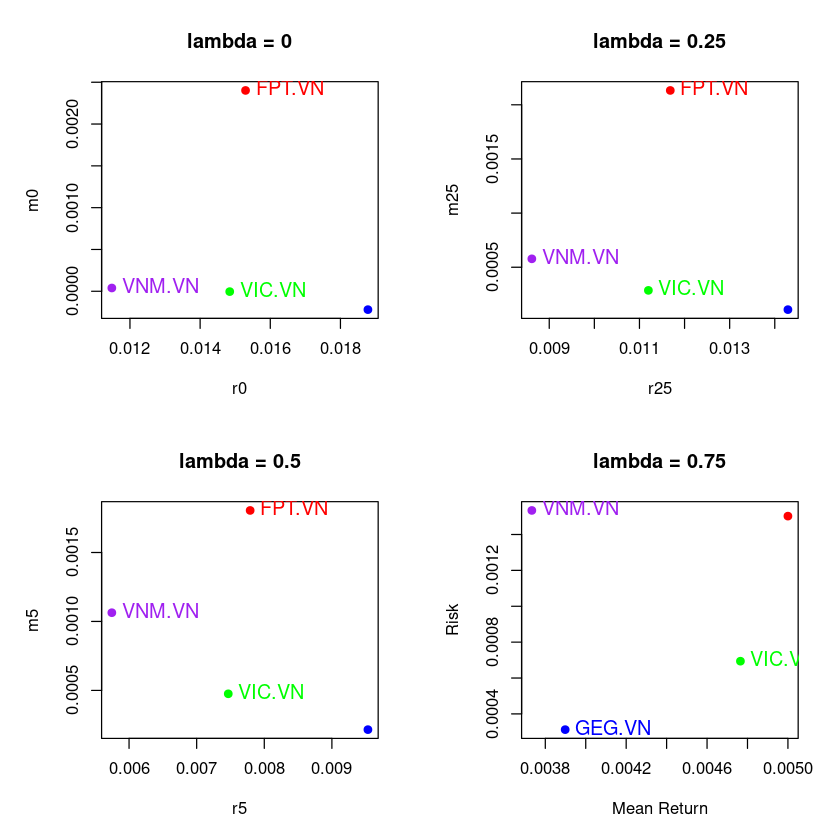

In [39]:
# Define the vectors
m0 <- c(0.002402058, -0.000219753, -4.11523*10^-06, 3.90947*10^-05)
m25 <- c(0.002132653, 0.000108571, 0.00028642, 0.000577778)
m5 <- c(0.001804898, 0.00021551, 0.000475309, 0.001063374)
m75 <- c(0.001502449, 0.000312245, 0.000693827, 0.001534151)
r0 <- c(0.01529505, 0.018783396, 0.014843951, 0.011483391)
r25 <- c(0.011683667, 0.014291587, 0.011198104, 0.008614168)
r5 <- c(0.007791058, 0.009532878, 0.007467404, 0.005745384)
r75 <- c(0.005, 0.003898357, 0.004765079, 0.00373341, 0.002870591)  # Corrected length

# Combine the vectors into a data frame
data <- data.frame(
  m = c(m0, m25, m5, m75),
  r = c(r0, r25, r5, r75[1:4]),  # Adjusted to match the length of 'm'
  stock = rep(c("FPT.VN", "GEG.VN", "VIC.VN", "VNM.VN"), 4)
)
data

# Define colors for each stock
colors <- c("FPT.VN" = "red", "GEG.VN" = "blue", "VIC.VN" = "green", "VNM.VN" = "purple")

# Separate into 4 plots for each pair of mean returns and risks
par(mfrow = c(2, 2), mar = c(5, 5, 4, 2) + 0.1)  # Set up a 4x1 plotting area with expanded margins

# Plot for m0 and r0
plot(r0, m0, main = "lambda = 0", pch = 19, col = colors[data$stock[1:4]])
text(r0, m0, labels = data$stock[1:4], pos = 4, col = colors[data$stock[1:4]], cex = 1.2)

# Plot for m25 and r25
plot(r25, m25, main = "lambda = 0.25", pch = 19, col = colors[data$stock[5:8]])
text(r25, m25, labels = data$stock[5:8], pos = 4, col = colors[data$stock[5:8]], cex = 1.2)

# Plot for m5 and r5
plot(r5, m5, main = "lambda = 0.5", pch = 19, col = colors[data$stock[9:12]])
text(r5, m5, labels = data$stock[9:12], pos = 4, col = colors[data$stock[9:12]], cex = 1.2)

# Plot for m75 and r75
plot(r75[1:4], m75, xlab = "Mean Return", ylab = "Risk", main = "lambda = 0.75", pch = 19, col = colors[data$stock[13:16]])
text(r75[1:4], m75, labels = data$stock[13:16], pos = 4, col = colors[data$stock[13:16]], cex = 1.2)

# Reset plotting area
par(mfrow = c(1, 1))

In [40]:
# Load necessary libraries
library(dplyr)
# Install and load the quadprog package
if (!requireNamespace("quadprog", quietly = TRUE)) {
  install.packages("quadprog")
}
library(quadprog)

# Calculate the mean returns and covariance matrix
mean_returns <- c(0.0015, 0.0003)
cov_matrix <- matrix(c(0.005^2, 0.00000492722, 0.00000492722, 0.0039^2),2,2)

# Define the objective function
objective_function <- function(weights, alpha, mean_returns, cov_matrix) {
  portfolio_return <- sum(weights * mean_returns)
  portfolio_variance <- t(weights) %*% cov_matrix %*% weights
  -alpha * portfolio_return + (1 - alpha) * portfolio_variance
}

# Set up the constraints
alpha <- 0.2  # You can adjust alpha as needed
Dmat <- (1 - alpha) * cov_matrix
dvec <- -alpha * mean_returns
Amat <- cbind(1, diag(ncol(cov_matrix)))
bvec <- c(1, rep(0, ncol(cov_matrix)))

# Solve the quadratic programming problem
result <- solve.QP(Dmat, dvec, Amat, bvec, meq = 1)

# Extract the optimal weights
optimal_weights <- result$solution
names(optimal_weights) <- colnames(cov_matrix)

# Display the optimal weights
optimal_weights

[1] -1.470027e-16  1.000000e+00

In [41]:
library(quadprog)
Dmat       <- matrix(c(0.12^2,0.0063,0.00168,0.0063,0.21^2,0.02646,0.00168,0.02646,0.28^2),3,3)
dvec       <- c(0,0,0)
Amat       <- matrix(c(1,0.07,1,0,0,1,0.12,0,1,0,1,0.18,0,0,1),3,5, byrow = T)
b0       <- c(1,0.0886,0,0,0)
n.eqs      <-2 # no constraints are equalities
sol <- solve.QP(2*Dmat,dvec,Amat,bvec=b0,meq=n.eqs)
#sol
(efficient_variance_port <- sol$solution)

[1] 0.7734545 0.1053335 0.1212120